In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
#this is the description of the bandits
#this will give the success probability associated with each of the arm
action = 5                                  #this is the number of actions that are possible
bandit = [0.5, 0.9 , 0.7 , 0.4 , 0.99]       #success probability associated with each bandit

reward_success = [1 , 1, 1 ,1 ,1]
reward_fail = [0 , 0 , 0 , 0 , 0]

#the problem is to choose the best arm
#according to the current probability distribution of the reward

In [3]:
number_of_episodes = 100000                         #number of episodes to run
selected = [0 for _ in range(action)]              #this will tell the number of times the arm is selected
Q = [0 for _ in range(action)]

In [4]:
def initialization():
    proportion = np.zeros ((0 , action))
    arm_picked = np.zeros ((0 , action))
    total = 0
    for a in range(action):
        selected[a] += 1               #increment the selected
        p_success = random.random()
        if (p_success < bandit[a]): 
            Q[a] = reward_success[a]      #update the value of q
            total += Q[a]
        else:
            Q[a] = reward_fail[a]
            total += Q[a]
        
        proportion = np.vstack((proportion , np.array(selected)/(a+1) ))
        arm_picked = np.vstack((arm_picked , np.array(selected) ))
        
    return (total , proportion , arm_picked)

In [5]:
#this function takes the value of q, number of times the arm is selected and t: the number of episodes passed
def bound(q , n , t):
    #print ((2*math.log(t))/n)
    return q + math.sqrt( (2*math.log(t))/n )
    

In [6]:
def upper_confidence_bound(episodes , total):
    
    
    upper_bounds = []
    for a in range(action):
        upper_bounds.append(bound (Q[a] , selected[a] , episodes))
    
    #this is the action that we are going to select
    a = np.argmax (upper_bounds)
    p_success = random.random()
    
    #this is for the success
    if (p_success < bandit[a]):
        selected[a] += 1               #increment the selected
        k = selected[a]
        Q[a] = Q[a] + (1/(k+1)) * (reward_success[a] - Q[a])      #update the value of q
        reward = reward_success[a]
    else:
        selected[a] += 1               #increment the selected
        k = selected[a]
        Q[a] = Q[a] + (1/(k+1)) * (reward_fail[a] - Q[a])      #update the value of q
        reward = reward_fail[a]
        
    return total + reward
    

In [7]:

total , proportion , arm_picked = initialization()
for itr in range(action,number_of_episodes):
    if (itr % 10000 == 0):
        print ("Number of iterations : " , itr)
    total = upper_confidence_bound(itr+1 , total)
    proportion = np.vstack((proportion , np.array(selected)/(itr+1) ))
    arm_picked = np.vstack((arm_picked , np.array(selected) ))

Number of iterations :  10000
Number of iterations :  20000
Number of iterations :  30000
Number of iterations :  40000
Number of iterations :  50000
Number of iterations :  60000
Number of iterations :  70000
Number of iterations :  80000
Number of iterations :  90000


In [8]:
print (Q)

[0.4999999999999998, 0.9048662867163526, 0.7072243346007605, 0.17142857142857143, 0.9901163029630504]


In [9]:
print (selected)

[93, 2280, 262, 34, 97331]


In [10]:
print (total)

98671


Text(0,0.5,'Proportion')

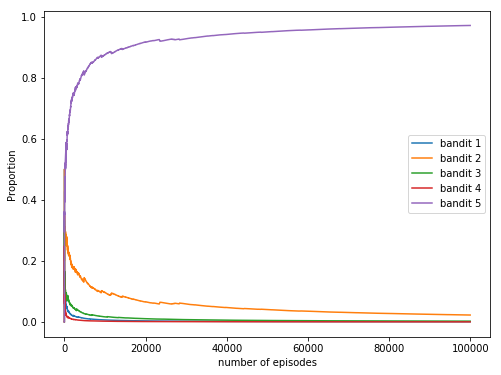

In [11]:
#plot for the proportion
bandit_name = ["bandit 1" , "bandit 2" , "bandit 3" , "bandit 4" , "bandit 5"]
plt.figure (figsize=(8 , 6))
for i , name  in zip (range(action) , bandit_name):
    plt.plot (range(1 , number_of_episodes) , proportion[1: , i] , label = name)
    
plt.legend()
plt.xlabel ("number of episodes")
plt.ylabel ("Proportion")

Text(0,0.5,'Number of times the arm is picked')

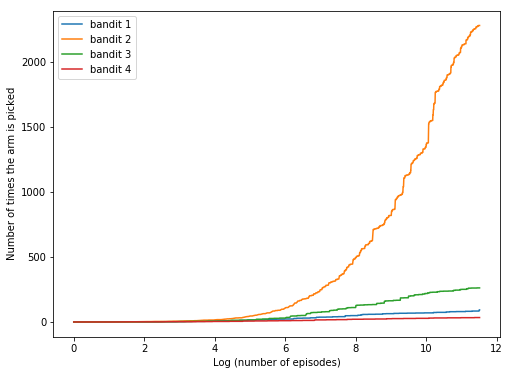

In [15]:
#plot for the proportion
bandit_name = ["bandit 1" , "bandit 2" , "bandit 3" , "bandit 4" , "bandit 5"]
plt.figure (figsize=(8 , 6))

argmx = np.argmax (Q)
for i , name  in zip (range(action) , bandit_name):
    if (i != argmx):
        plt.plot (np.log(range(1,number_of_episodes+1)) , arm_picked[: , i] , label = name)
    
plt.legend()
plt.xlabel ("Log (number of episodes)")
plt.ylabel ("Number of times the arm is picked")

In [16]:
delta = (arm_picked[number_of_episodes - 500 , 1] - arm_picked[number_of_episodes -1 , 1])
delta = delta / (math.log (number_of_episodes - 500) - math.log(number_of_episodes - 1))
print(delta)

-0.0
